### Steps
1. Data loading
2. data cleaning
3. data preprcessing
4. text preprocessing

In [2]:
# Loading the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\priya\OneDrive\Desktop\Datasets\archive (3)\spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.duplicated().sum()

403

In [7]:
# dropping the duplicates
data = data.drop_duplicates(keep='first') 

In [8]:
data.shape

(5169, 5)

In [9]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [10]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
## encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

### EDA

In [13]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23d3c7f1f10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

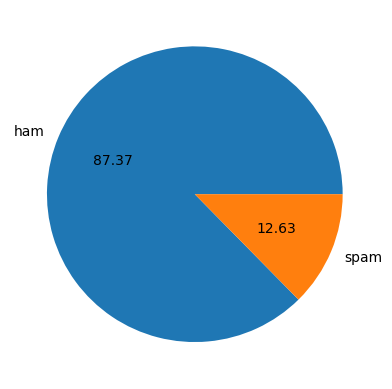

In [14]:
plt.pie(data['target'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
## the data we have is imbalances 

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data['num_characters'] = data.text.apply(len)
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Countinghte number of words in the text
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [19]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
# spam
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [21]:
## Ham
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

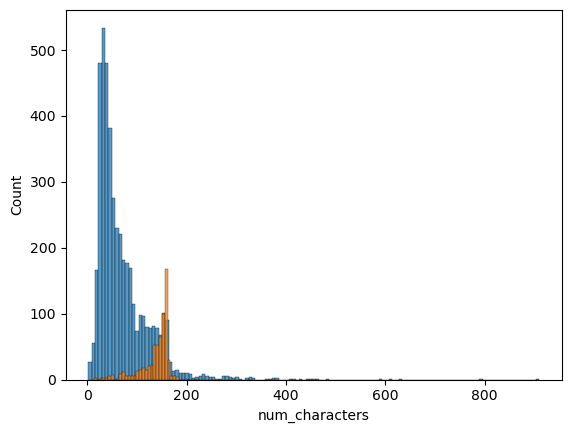

In [22]:
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'])


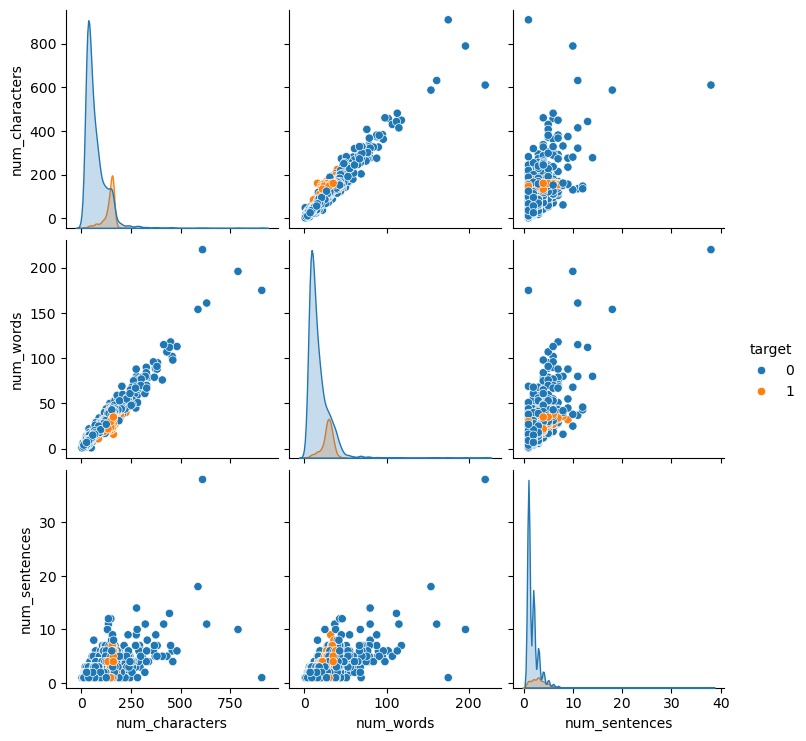

In [23]:

sns.pairplot(data,hue='target')

<Axes: >

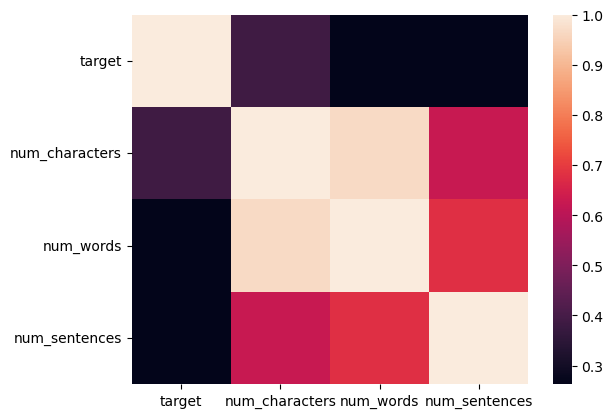

In [24]:
sns.heatmap(data.drop(columns='text').corr())

In [25]:
# Dropping teh num_senetences and num_words due to high correlation

### Data Preprocessing
1. lower case
2. tokenization
3. removing special characters
4. removing stopwords and puntuation
5. stemming

In [51]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # converting into lower case 
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # removing non-alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # removing stopwords and punctuation
    cleaned_text = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            cleaned_text.append(i)
    
    
    root_words = [ ]
    for i in cleaned_text:
        root_words.append(ps.stem(i))
        
    return " ".join(root_words)


transform_text('did u like my presentation i on ml ??? ^^^')


'u like present ml'


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [53]:
data['transform_text'] =  data['text'].apply(transform_text)

In [55]:
# using wordclowd for spam and ham
from wordcloud import WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [57]:
spam_wc= wc.generate(data[data['target']==1]['transform_text'].str.cat(sep=' '))

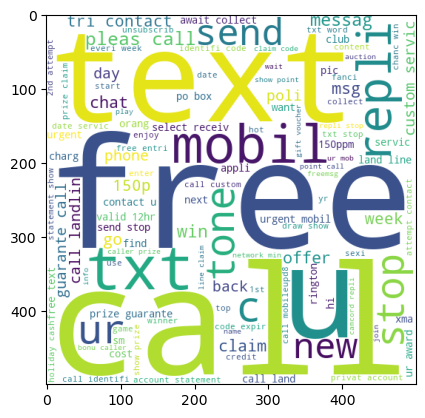

In [59]:
plt.imshow(spam_wc)

In [61]:
ham_wc= wc.generate(data[data['target']==0]['transform_text'].str.cat(sep=' '))

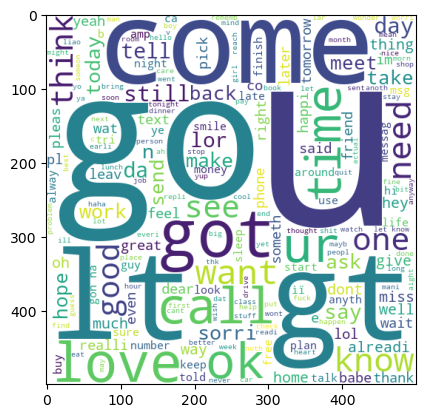

In [63]:
plt.imshow(ham_wc)

In [65]:
# getting the top  30 words from spam and ham
spam_corpus = []
for msg in data[data['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)
# the lenght of spam is less

9939

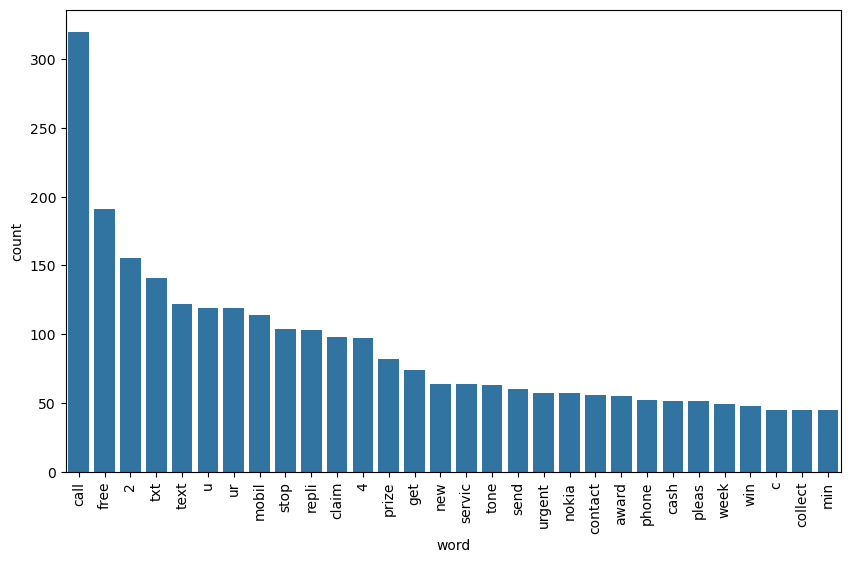

In [67]:
from collections import Counter

most_common_words = Counter(spam_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))  # Optional: Adjust the figure size
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


In [69]:
# getting the top  30 words from spam and ham
ham_corpus = []
for msg in data[data['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)
# the lenght of ham is less

35404

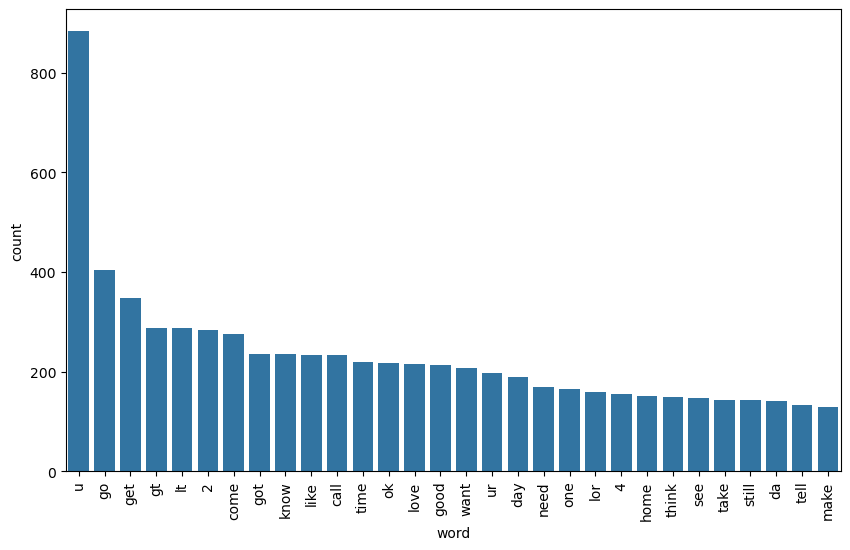

In [71]:


most_common_words = Counter(ham_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))  # Optional: Adjust the figure size
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

### Model Building  

In [74]:
data.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
## COnverting the text to vectors
## using bow 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [78]:
X = cv.fit_transform(data['transform_text']).toarray( )
X.shape


(5169, 6708)

In [80]:
y = data['target'].values

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [88]:
gnb =  GaussianNB()
mnb =  MultinomialNB()
bnb = BernoulliNB()

In [90]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8684719535783365

In [92]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.8684719535783365
precision_score : 0.5185185185185185
confusion_matrix : [[772 117]
 [ 19 126]]


In [94]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [96]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.9738878143133463
precision_score : 0.8881578947368421
confusion_matrix : [[872  17]
 [ 10 135]]


In [98]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

In [100]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.9661508704061895
precision_score : 0.9661016949152542
confusion_matrix : [[885   4]
 [ 31 114]]


In [102]:
## Creating vectors using tf-idf
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['transform_text']).toarray( )
X.shape

(5169, 6708)

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8636363636363636

In [108]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.8636363636363636
precision_score : 0.5084033613445378
confusion_matrix : [[772 117]
 [ 24 121]]


In [110]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9613152804642167

In [112]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.9613152804642167
precision_score : 0.9906542056074766
confusion_matrix : [[888   1]
 [ 39 106]]


In [114]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9661508704061895

In [116]:
print('accuracy_score :', accuracy_score(y_test,y_pred))
print('precision_score :', precision_score(y_test,y_pred))
print('confusion_matrix :', confusion_matrix(y_test,y_pred))

accuracy_score : 0.9661508704061895
precision_score : 0.9661016949152542
confusion_matrix : [[885   4]
 [ 31 114]]


#### From all the above models the model with Tfidf vectorization  and multinomial naive bayes gives the best precision score

In [119]:
## comparing with some more models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [123]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [125]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [127]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.971953578336557, 0.9393939393939394)

In [129]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9393939393939394
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9342359767891683
Precision -  0.808
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276


C:\Users\priya\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9477756286266924
Precision -  0.8421052631578947
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.968503937007874


In [131]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [133]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.968504
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [135]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))